IMPORTING LIBRARIES

In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READ DATA FROM EXCEL FILE

In [69]:
data = pd.read_csv("House_cost_prediction.csv")

In [70]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
data.shape


(545, 13)

In [72]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [73]:
data.isnull().sum().sum()

0

In [74]:
print(data.drop_duplicates(inplace=True))

None


In [75]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

DATA PREPROCESSING

In [78]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [79]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Heat Map

<Axes: >

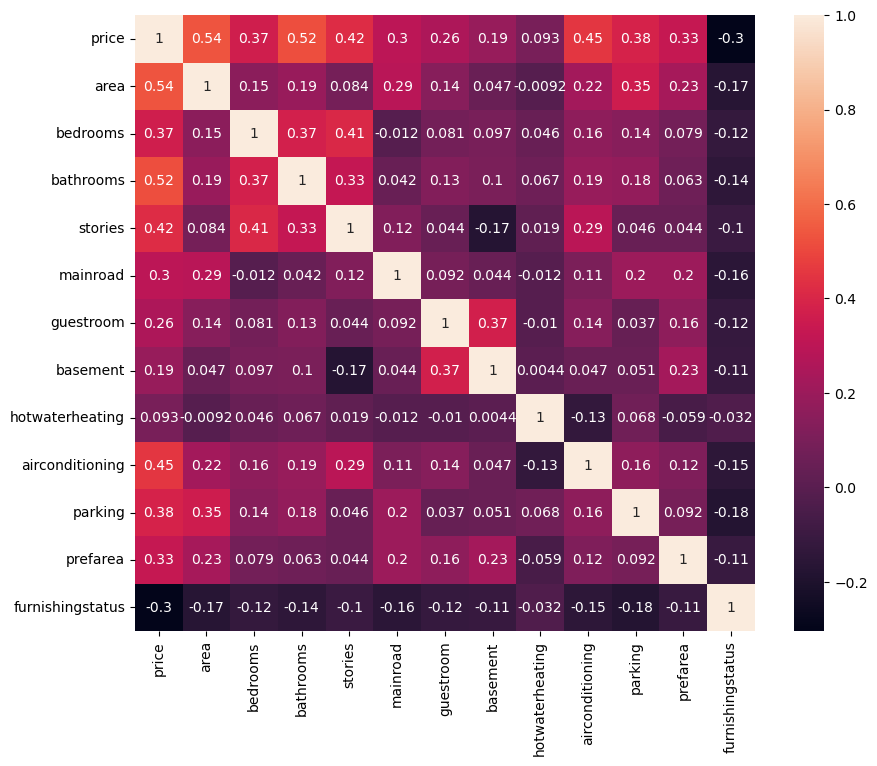

In [80]:

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [81]:
X = data.drop(['price'],axis=1)
y = data['price']

In [82]:
X
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

Splitting the data 

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=False)

LINEAR REGRESSION

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [85]:
model.fit(X_train,y_train)


LinearRegression()

In [86]:
y_predict = model.predict(X_test)


In [87]:
y_predict


array([ 3984967.27379869,  6244647.72325839,  4429090.9901644 ,
        7327161.48579821,  2884712.13473903,  6980921.09080045,
        3292173.52565773,  3158447.77360932,  3546517.87305605,
        8271816.41131331,  6618193.85905408,  3751711.14944585,
        3753935.4031728 ,  4583853.18651575,  3966468.54850109,
        2025300.97229438,  3979784.91637274,  3615814.15041026,
        3199944.39530576,  4676419.07100895,  5824326.87304756,
        6417699.13990319,  4677337.71216349,  2728847.04375271,
        5377896.73425207,  5707297.17442576,  5362417.43584814,
        5438360.52073505,  5617773.48208081,  5898735.9284781 ,
        3300971.79501468,  6360929.40425071,  7164452.04681266,
        2981160.3063386 ,  4451574.86158015,  5152282.50541988,
        4970121.01081921,  3650908.24269672,  2936483.25105249,
        4005062.87644454,  8012393.06719837,  4975403.38914817,
        6433427.87760297,  3614305.53600402,  3906804.95173331,
        6295100.53701061,  4547614.94164

Evaluation Metrics

In [88]:
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [89]:
score*100

72.3501522320035

In [90]:
mae

733152.2053964165